In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#cheking version of tensorflow ans keras
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.11.0
Keras Version: 2.11.0


In [3]:
#get current working directory
os.getcwd()

'C:\\Users\\Admin'

In [4]:
#GPU / CPU Check
tf.config.list_physical_devices("GPU")

[]

In [5]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU' , 'CPU']
for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f"(device) is available ")
        print(f"Details >> {out}")
    else:
        print(f"(device) isn't available ")

(device) isn't available 
(device) is available 
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#### Creating a Simple classifier using keras on MNIST data

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [9]:
(X_train_full,y_train_full) , (X_test,y_test) = mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
X_train_full[0].shape

(28, 28)

In [14]:
print(f"data type of X_train_full: (X_train_full.dtype),\n shape of X_train_full(X_train_full.shape)")

data type of X_train_full: (X_train_full.dtype),
 shape of X_train_full(X_train_full.shape)


In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
#create a validation data set from the full training data
#scale the data between 0 to 1 by dividing it by 255. as its an unsighned data between 0-255 range
X_valid , X_train = X_train_full[:5000] / 255.,X_train_full[5000:] / 255.
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

In [17]:
X_test = X_test / 255

In [18]:
#TRAIN - 5000
#TEST - 10000
#VALIDATION - 5000

In [19]:
len(X_train_full[5000:])

55000

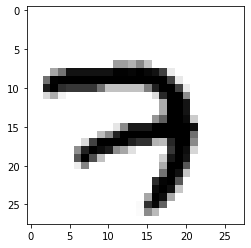

In [20]:
plt.imshow(X_train[0] , cmap="binary")
plt.show()

<AxesSubplot:>

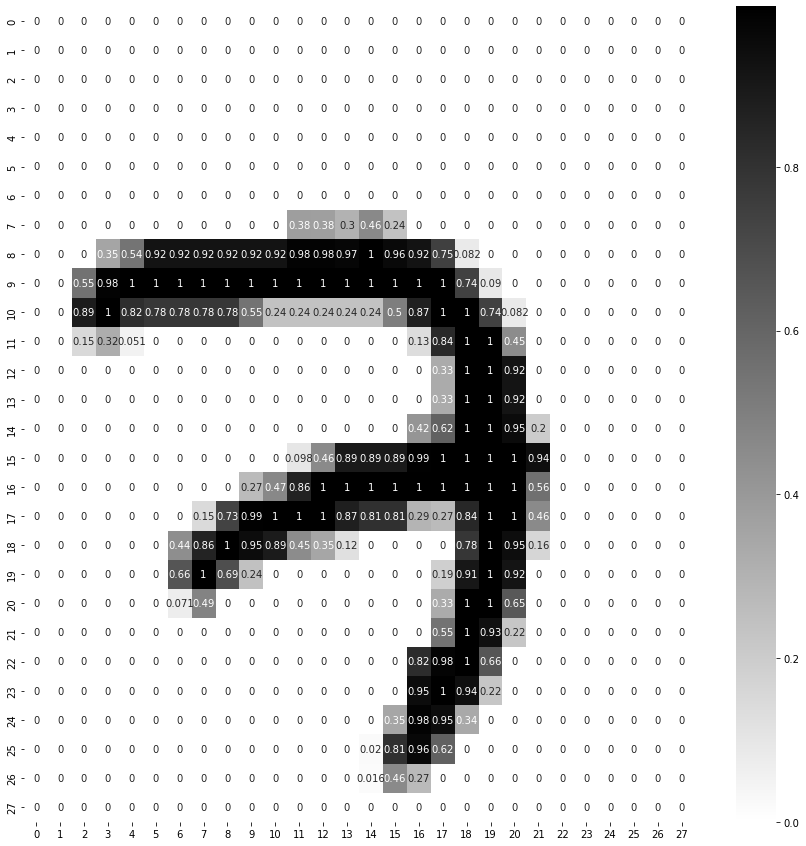

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True , cmap="binary")

In [22]:
28*28

784

In [23]:
#Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
tf.keras.layers.Dense(300,activation ="relu" , name="hiddenLayer1"),
tf.keras.layers.Dense(100,activation = "relu", name="hiddenLayer2"),
tf.keras.layers.Dense(10 ,activation = "softmax" ,name="outputLayer")]

In [24]:
LAYERS

In [25]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [26]:
model_clf

In [27]:
#Method-2
#from keras.models import Sequential
#from keras.layers import Dense , Flatten
# # Define the model
#model = Sequential()
#model.add(Dense(units=64,activation='relu',input_dim=100))
#model.add(Dense(units=10,activation='softmax'))

In [28]:
model_clf.layers

In [29]:
300*100+100

30100

In [30]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
# firstLayer * secondLayer + bias
784 * 300 + 300,300*100+100 , 100*10+10

(235500, 30100, 1010)

In [32]:
# Total parameters to be trained
sum((235500 , 30100 , 1010))

266610

In [33]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [34]:
len(hidden1.get_weights())

2

In [35]:
hidden1.get_weights()

[array([[-0.07108521,  0.01235043, -0.06483564, ..., -0.00652746,
         -0.00787196,  0.03470328],
        [-0.04872008,  0.02250636,  0.04882757, ..., -0.00863905,
          0.02509662,  0.02675635],
        [-0.02371379, -0.04436642,  0.05484696, ..., -0.02197795,
         -0.07347154,  0.04399912],
        ...,
        [-0.06418824,  0.03471784, -0.05900547, ...,  0.07359982,
         -0.04558497, -0.01354835],
        [ 0.06907803, -0.01192282,  0.06401791, ..., -0.05849165,
         -0.06675027, -0.06003336],
        [ 0.02344194, -0.00965109,  0.0223216 , ..., -0.03714204,
         -0.07272359, -0.05809426]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [36]:
weights,biases = hidden1.get_weights()

In [37]:
weights.shape

(784, 300)

In [38]:
print("shape\n",weights.shape,"\n")
weights

shape
 (784, 300) 



array([[-0.07108521,  0.01235043, -0.06483564, ..., -0.00652746,
        -0.00787196,  0.03470328],
       [-0.04872008,  0.02250636,  0.04882757, ..., -0.00863905,
         0.02509662,  0.02675635],
       [-0.02371379, -0.04436642,  0.05484696, ..., -0.02197795,
        -0.07347154,  0.04399912],
       ...,
       [-0.06418824,  0.03471784, -0.05900547, ...,  0.07359982,
        -0.04558497, -0.01354835],
       [ 0.06907803, -0.01192282,  0.06401791, ..., -0.05849165,
        -0.06675027, -0.06003336],
       [ 0.02344194, -0.00965109,  0.0223216 , ..., -0.03714204,
        -0.07272359, -0.05809426]], dtype=float32)

In [39]:
print("shape\n" , biases.shape)

shape
 (300,)


In [40]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" #use with custom learning rata =>tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION,
        optimizer=OPTIMIZER,
        metrics=METRICS)

In [41]:
#taining
EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)
history = model_clf.fit(X_train , y_train , epochs = EPOCHS,
validation_data=VALIDATION_SET , batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6044 - accuracy: 0.8447 - val_loss: 0.3090 - val_accuracy: 0.9170
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2887 - accuracy: 0.9180 - val_loss: 0.2392 - val_accuracy: 0.9350
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2363 - accuracy: 0.9324 - val_loss: 0.2154 - val_accuracy: 0.9394
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2024 - accuracy: 0.9426 - val_loss: 0.1848 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1767 - accuracy: 0.9496 - val_loss: 0.1644 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1573 - accuracy: 0.9556 - val_loss: 0.1495 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1415 - accuracy: 0.9603 - val_loss: 0.1352 - val_accuracy

In [42]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.604380,0.844745,0.309036,0.9170
1,0.288720,0.918036,0.239161,0.9350
2,0.236290,0.932382,0.215360,0.9394
3,0.202420,0.942618,0.184824,0.9518
4,0.176720,0.949636,0.164403,0.9564
5,0.157265,0.955618,0.149467,0.9602
6,0.141476,0.960273,0.135174,0.9624
7,0.128065,0.963745,0.126578,0.9636
8,0.116736,0.967582,0.119061,0.9662
9,0.106814,0.970109,0.112588,0.9672


<AxesSubplot:>

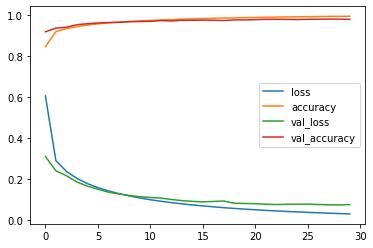

In [44]:
pd.DataFrame(history.history).plot()

In [45]:
model_clf.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9771


[0.07327546924352646, 0.9771000146865845]

## SAMPLE CHECK - TEST DATA

In [46]:
# x_new
x_new = X_test [:3]

In [47]:
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [48]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<AxesSubplot:>

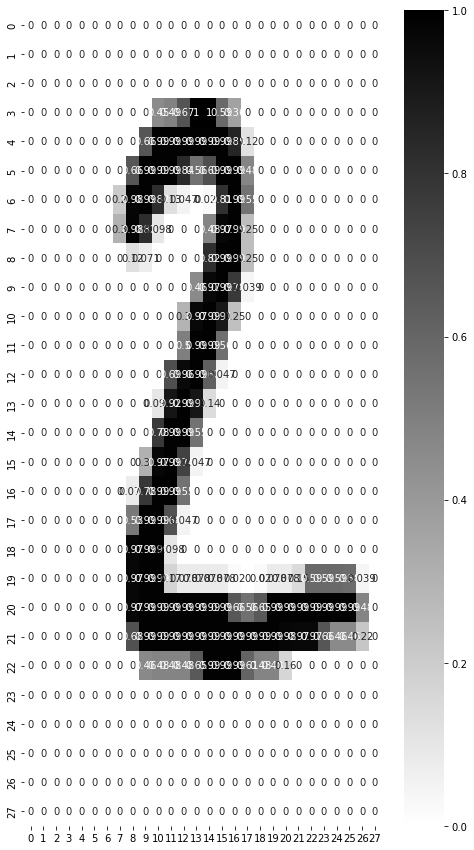

In [49]:
plt.figure(figsize=(8,15))
sns.heatmap(X_test[1] , annot=True,cmap = "binary")

In [50]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 128ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [51]:
 y_prob

array([[1.6450037e-06, 1.3686987e-07, 1.1992410e-05, 2.2904226e-04,
        4.3632362e-08, 9.6573820e-07, 4.2643469e-13, 9.9974555e-01,
        6.4895767e-06, 4.0793016e-06],
       [3.8203630e-06, 1.4189437e-04, 9.9970078e-01, 1.3494768e-04,
        8.2423672e-11, 7.4591064e-08, 7.3742231e-06, 5.0208205e-13,
        1.1141257e-05, 7.6645450e-13],
       [8.0568307e-06, 9.9721175e-01, 8.5511012e-04, 9.2357091e-05,
        3.4546937e-04, 4.3568689e-05, 9.7253142e-05, 1.0063566e-03,
        3.3192080e-04, 8.2064889e-06]], dtype=float32)

In [52]:
y_pred = np.argmax(y_prob , axis = -1)

In [53]:
y_pred

array([7, 2, 1], dtype=int64)

In [54]:
actual

array([7, 2, 1], dtype=uint8)

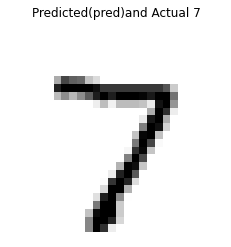

#######


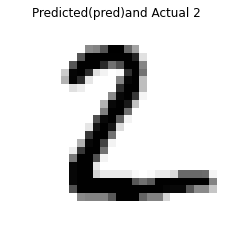

#######


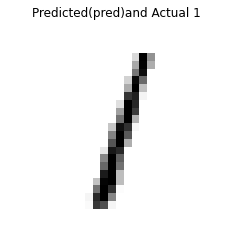

#######


In [55]:
#plot
for data,pred,actual_data in zip(x_new,y_pred,actual):
    plt.imshow(data,cmap = "binary")
    plt.title(f"Predicted(pred)and Actual {actual_data}")
    plt.axis("off")
    plt.show()
    print("#######")